In [59]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

plt.rc('font', family='Malgun Gothic')  # 폰트 지정
plt.rc('axes', unicode_minus=False)  # 마이너스 폰트 설정
%config InlineBackend.figure_format = 'retina'  # 그래프 글씨 뚜렷

In [60]:
df_train = pd.read_csv("../data/df_train_004.csv")
df_test = pd.read_csv("../data/df_test_004.csv")

df_train['target'] = df_train['사망자수']*10 + df_train['중상자수']*5 + df_train['경상자수']*3 + df_train['부상자수']
df_train.drop(columns = ['사망자수','중상자수','경상자수','부상자수'], axis=1, inplace = True)

In [61]:
X = df_train.drop(columns = 'target',axis=1)
y = df_train['target']

In [62]:
x_train, x_test, y_train , y_test = train_test_split(X, y, test_size = 0.3, random_state=42 )

In [63]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[33]),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.LeakyReLU(alpha=0.2),
    tf.keras.layers.Dense(5),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.LeakyReLU(alpha=0.2),
    tf.keras.layers.Dense(1)
])

In [64]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001), loss=tf.keras.losses.Huber(), metrics=['mse'])

In [65]:
early_stopping = EarlyStopping()

In [66]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100, callbacks = [early_stopping])

Epoch 1/100
867/867 [==============================] - 2s 2ms/step - loss: 4.2248 - mse: 33.1157 - val_loss: 3.9857 - val_mse: 31.3207
Epoch 2/100
867/867 [==============================] - 2s 2ms/step - loss: 3.8260 - mse: 29.1974 - val_loss: 3.5951 - val_mse: 27.7207
Epoch 3/100
867/867 [==============================] - 2s 2ms/step - loss: 3.4173 - mse: 25.5219 - val_loss: 3.1700 - val_mse: 24.1056
Epoch 4/100
867/867 [==============================] - 2s 2ms/step - loss: 2.9726 - mse: 21.8974 - val_loss: 2.6960 - val_mse: 20.4683
Epoch 5/100
867/867 [==============================] - 2s 2ms/step - loss: 2.5046 - mse: 18.4881 - val_loss: 2.2418 - val_mse: 17.3761
Epoch 6/100
867/867 [==============================] - 2s 2ms/step - loss: 2.0867 - mse: 15.6477 - val_loss: 1.8962 - val_mse: 15.0289
Epoch 7/100
867/867 [==============================] - 2s 2ms/step - loss: 1.8145 - mse: 13.6301 - val_loss: 1.6907 - val_mse: 13.3615
Epoch 8/100
867/867 [==============================] - 

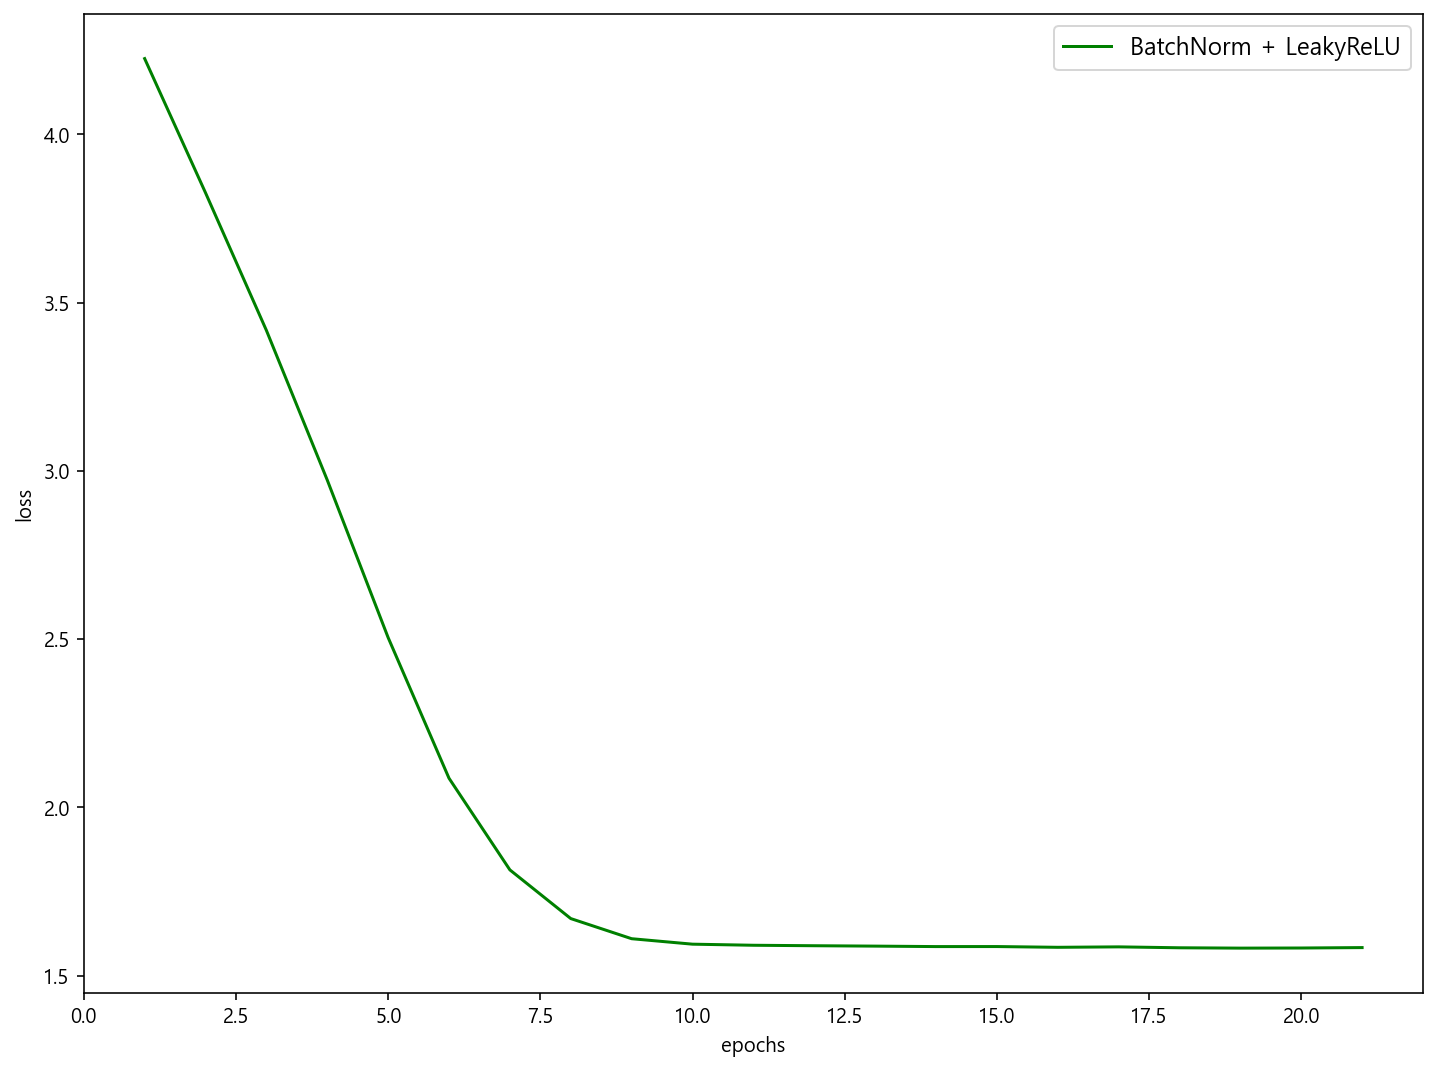

In [68]:
plt.figure(figsize=(12, 9))
plt.plot(np.arange(1,len(history.history['loss'])+1), history.history['loss'], color='green',linestyle='-')

plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['BatchNorm + LeakyReLU'], fontsize=12)
plt.show()

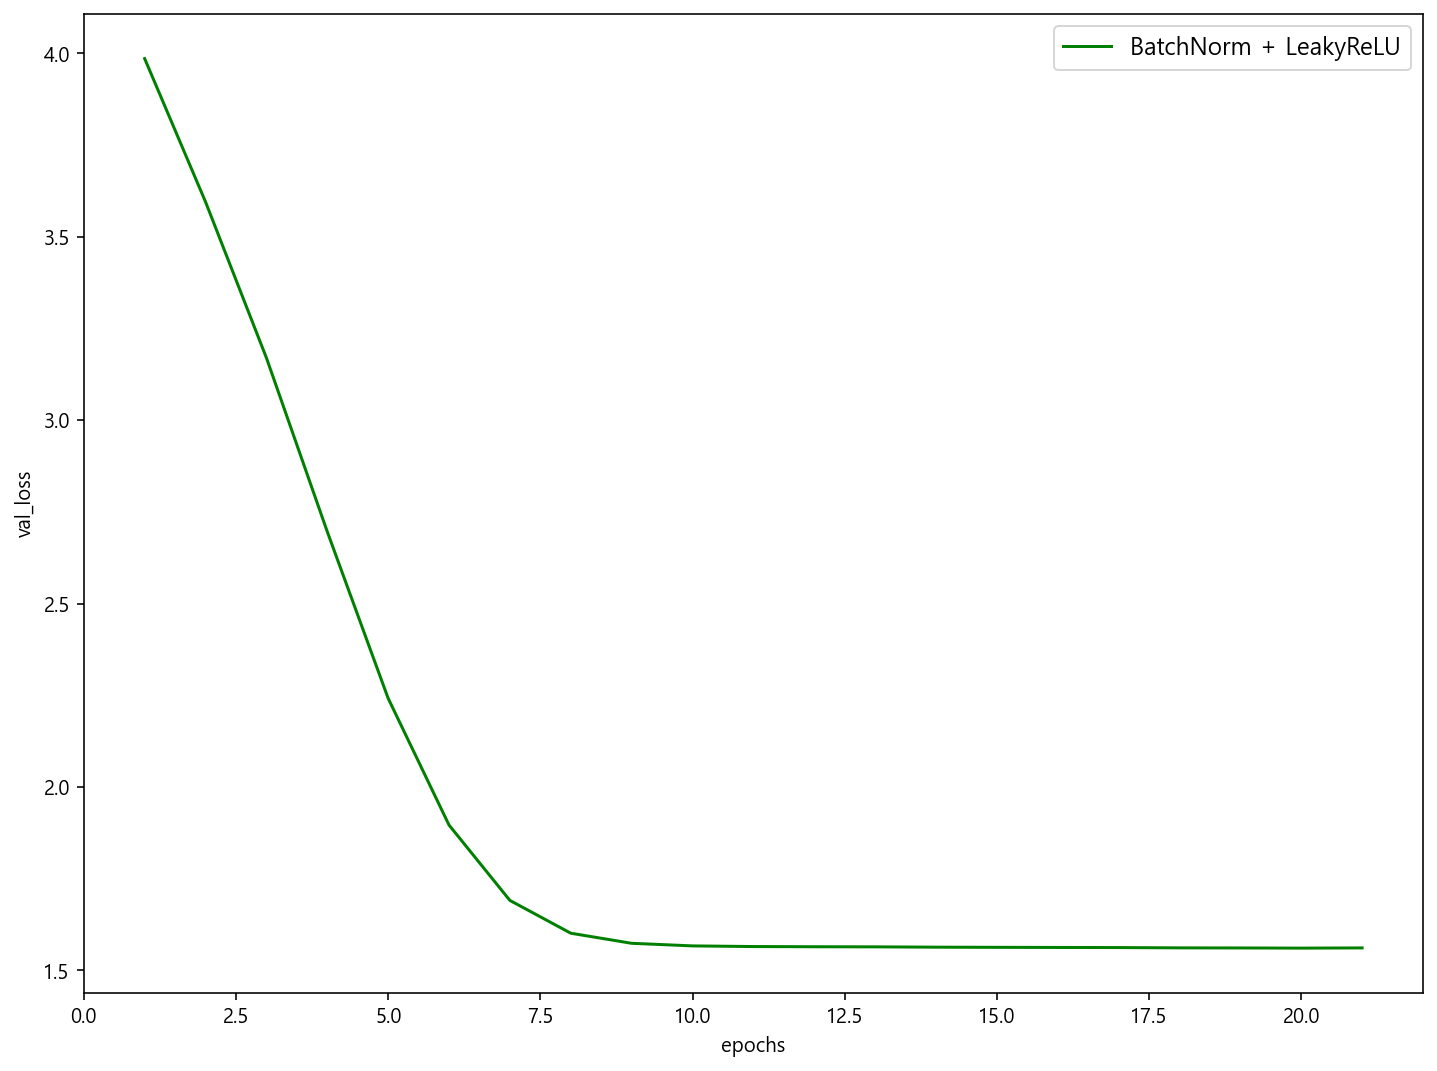

In [69]:
plt.figure(figsize=(12, 9))
plt.plot(np.arange(1,len(history.history['val_loss'])+1), history.history['val_loss'], color='green',linestyle='-')

plt.xlabel('epochs')
plt.ylabel('val_loss')
plt.legend(['BatchNorm + LeakyReLU'], fontsize=12)
plt.show()

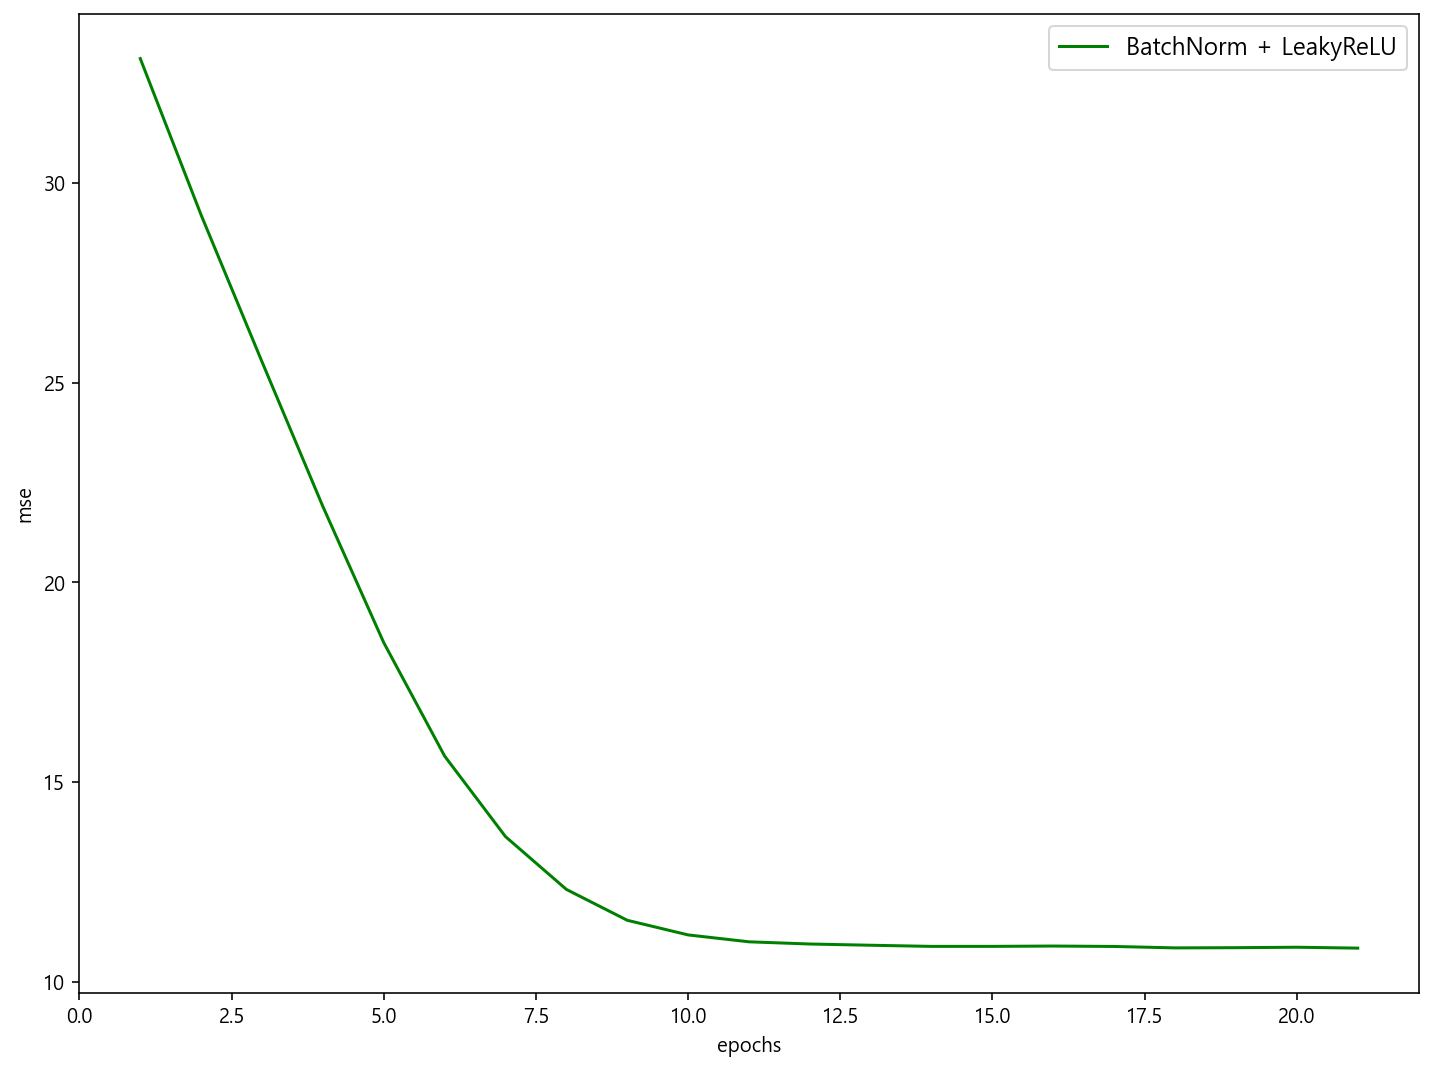

In [71]:
plt.figure(figsize=(12, 9))
plt.plot(np.arange(1,len(history.history['mse'])+1), history.history['mse'], color='green',linestyle='-')

plt.xlabel('epochs')
plt.ylabel('mse')
plt.legend(['BatchNorm + LeakyReLU'], fontsize=12)
plt.show()

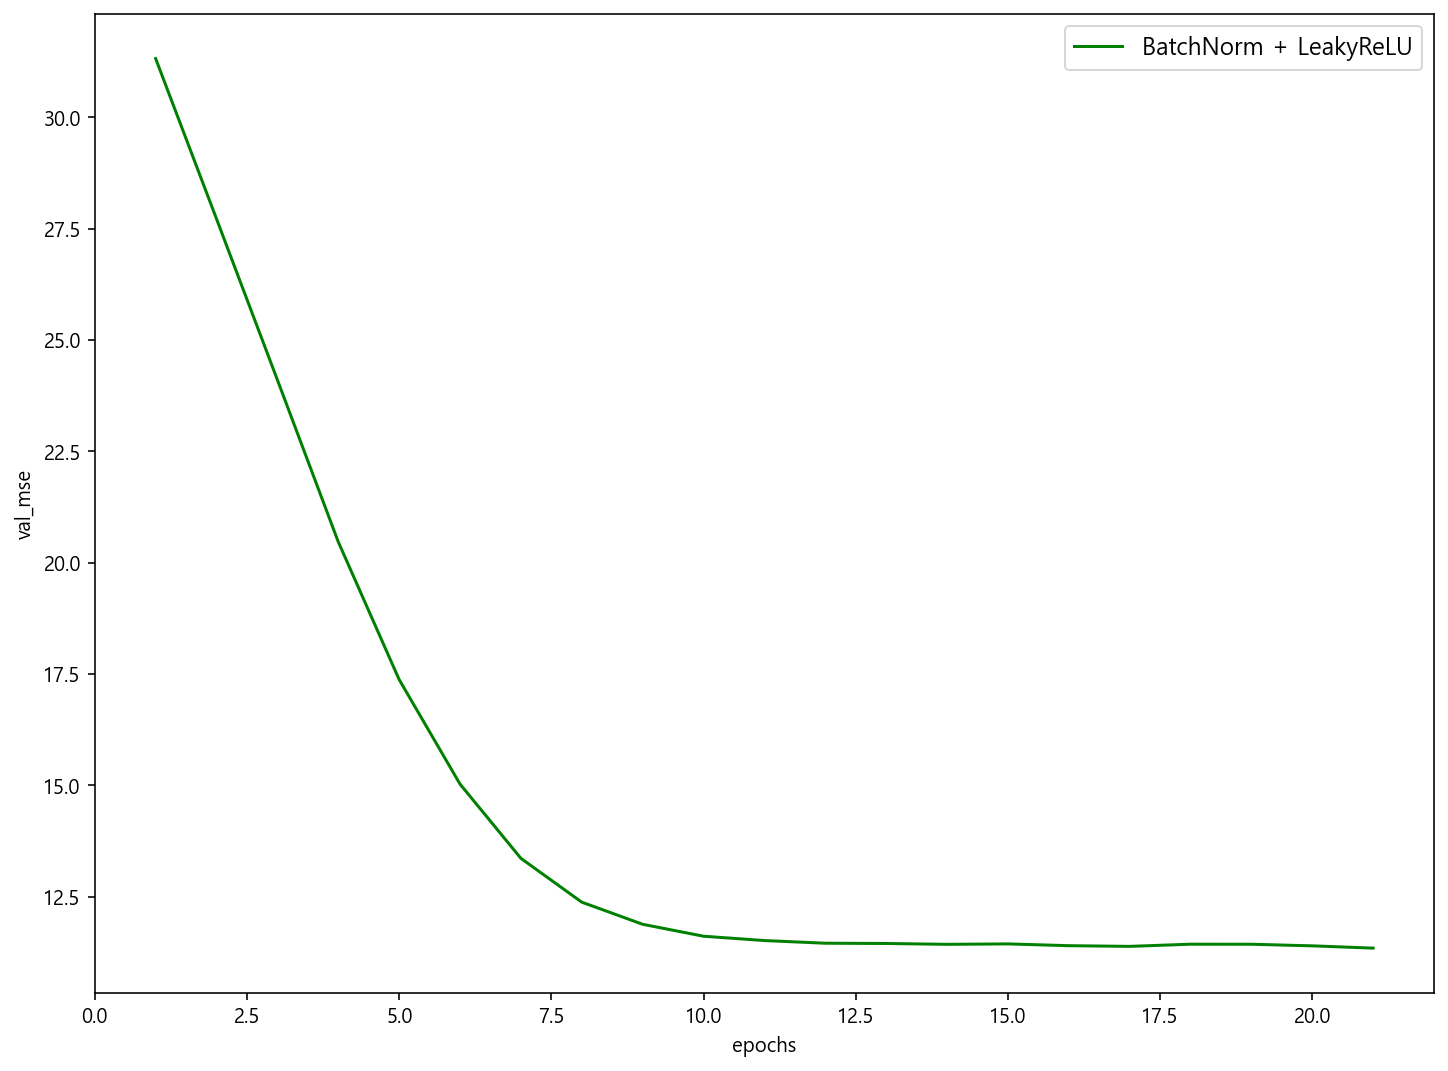

In [72]:
plt.figure(figsize=(12, 9))
plt.plot(np.arange(1,len(history.history['val_mse'])+1), history.history['val_mse'], color='green',linestyle='-')

plt.xlabel('epochs')
plt.ylabel('val_mse')
plt.legend(['BatchNorm + LeakyReLU'], fontsize=12)
plt.show()

# 제출

In [73]:
model.save('../model/006_Batch_Leaky-model.h5')

In [74]:
sub_file = pd.read_csv("../data/sample_submission.csv")

In [75]:
sub_file['ECLO'] = model_c.predict(df_test)
sub_file['ECLO'] = round(sub_file['ECLO'])

343/343 [==============================] - 0s 893us/step


In [77]:
sub_file.ECLO.value_counts()

4.0    10136
3.0      680
5.0      147
Name: ECLO, dtype: int64

In [78]:
sub_file.to_csv("../data/sub_file/010tf_Huber_lr.csv", index=False)